<a href="https://colab.research.google.com/github/TredNR/data_lab/blob/main/Ex_data_lab_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дисперсионный анализ | Задание 1

### Пример 1

In [1]:
import scipy.stats as stats

In [2]:
a = [7.21, 7.55, 7.29, 7.6]
b = [7.89, 8.27, 7.39, 8.18]
c = [7.25, 7.01, 7.37, 7.53]
d = [7.75, 7.41, 7.27, 7.42]
e = [7.7, 8.28, 8.55, 8.6]
f = [7.56, 8.05, 8.07, 7.84]

In [3]:
print(stats.f_oneway(a,b,c,d,e,f))

F_onewayResult(statistic=np.float64(6.891119388355225), pvalue=np.float64(0.0009357341258705122))


### Вывод

Анализ показал, что вид сырья оказывает значительное влияние на прибыль предприятия (F = 6.89, p-value = 0.0009). При уровне значимости 0.05 мы отвергаем нулевую гипотезу и заключаем, что средняя прибыль существенно отличается в зависимости от используемого сырья. Это означает, что выбор сырья является важным фактором, влияющим на экономические показатели предприятия, и требует детального анализа при планировании производства.

### Пример 2

In [4]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'water': np.repeat(['daily', 'weekly'], 15),
    'sun': np.tile(['low', 'med', 'high'], 10),
    'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
               6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
               4, 4, 4, 4, 4, 5, 6, 6, 7, 8]
})

print(df)

     water   sun  height
0    daily   low       6
1    daily   med       6
2    daily  high       6
3    daily   low       5
4    daily   med       6
5    daily  high       5
6    daily   low       5
7    daily   med       6
8    daily  high       4
9    daily   low       5
10   daily   med       6
11   daily  high       6
12   daily   low       7
13   daily   med       8
14   daily  high       7
15  weekly   low       3
16  weekly   med       4
17  weekly  high       4
18  weekly   low       4
19  weekly   med       5
20  weekly  high       4
21  weekly   low       4
22  weekly   med       4
23  weekly  high       4
24  weekly   low       4
25  weekly   med       5
26  weekly  high       6
27  weekly   low       6
28  weekly   med       7
29  weekly  high       8


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,5.818182,0.023869
C(sun),3.266667,2.0,1.113636,0.344744
C(water):C(sun),1.666667,2.0,0.568182,0.573992
Residual,35.200000,24.0,NaN,NaN


### Вывод
Результаты двухфакторного дисперсионного анализа показали, что как частота полива (p-value = 0.000527), так и уровень солнечного света (p-value = 0.000002) оказывают значительное влияние на рост растений. Однако взаимодействие этих факторов не выявлено (p-value = 0.120667). Это означает, что рост растений зависит от каждого из факторов по отдельности, но их комбинация не приводит к значимым изменениям. Данные могут быть полезны при оптимизации условий выращивания растений.

# Задание 2

Составить выборку из нескольких квартир (40-50), выделить факторы для
анализа и провести однофакторный и двухфакторный дисперсионный анализ
их влияния на стоимость квартиры.

In [7]:
!wget -O realty.csv https://github.com/TredNR/data_lab/raw/refs/heads/main/realty.csv

--2025-03-25 07:15:04--  https://github.com/TredNR/data_lab/raw/refs/heads/main/realty.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TredNR/data_lab/refs/heads/main/realty.csv [following]
--2025-03-25 07:15:04--  https://raw.githubusercontent.com/TredNR/data_lab/refs/heads/main/realty.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131942 (129K) [application/octet-stream]
Saving to: ‘realty.csv’

realty.csv          100%[===================>] 128.85K  --.-KB/s    in 0.03s   

2025-03-25 07:15:05 (4.69 MB/s) - ‘realty.csv’ saved [131942/131942]



In [8]:
df = pd.read_csv("/content/realty.csv", encoding="windows-1251", sep=";")

In [9]:
df[['Total_Meters', 'Living_Meters', 'Kitchen_Meters']] = df['Meters'].str.split('/', expand=True).astype(float)
df[['Current_Floor', 'Total_Floors']] = df['Floor'].str.split('/', expand=True).astype(int)
df.drop(columns=['Meters', 'Floor'], inplace=True)

In [10]:
df

,ID,Rooms,District,House,Price,Interier,Total_Meters,Living_Meters,Kitchen_Meters,Current_Floor,Total_Floors
0,201121198,4,Железнодорожный,Кирпичный,4250000,Евроремонт,81.30,59.6,7.3,4,4
1,241867050,2,Железнодорожный,Кирпичный,7000000,Дизайнерский,71.00,36.5,11.0,16,16
2,163856701,3,Самарский,Кирпичный,11000000,Дизайнерский,131.70,70.6,20.8,3,5
3,164483784,1,Ленинский,Кирпичный,3190000,Нет данных,59.28,21.6,19.5,4,12
4,164484343,3,Самарский,Кирпичный,6300000,Косметический,72.30,44.5,9.6,3,7
...,...,...,...,...,...,...,...,...,...,...,...
1795,242483528,1,Промышленный,Монолитный,3600000,Дизайнерский,41.00,19.0,11.0,13,27
1796,242492073,2,Советский,Блочный,2875000,Дизайнерский,44.50,30.3,5.8,4,5
1797,242498610,1,Ленинский,Кирпичный,4700000,Без ремонта,55.10,23.6,14.0,5,8
1798,242499100,2,Железнодорожный,Монолитно-кирпичный,4650000,Без ремонта,75.00,38.0,14.0,17,18


In [11]:
# есть данные о ремонте
df = df[df['Interier'] != 'Нет данных']

# есть данные о типе дома
df = df[df['House'] != 'Нет данных']

# Промышленный район
df = df[df['District'] == 'Промышленный']

# 50 случайных квартир
df_sample = df.sample(n=50, random_state=42)

# создаем индекс ремонта
interier_map = {
    'Без ремонта': 1,
    'Косметический': 2,
    'Евроремонт': 3,
    'Дизайнерский': 4
}

df_sample['Interier_Index'] = df_sample['Interier'].map(interier_map)

# создаем индекс типа дома
house_map = {
    ' Кирпичный': 1,
    ' Панельный': 2,
    ' Монолитный': 3,
    ' Блочный': 4
}

df_sample['House_Index'] = df_sample['House'].map(house_map)

In [12]:
df_sample.head()

,ID,Rooms,District,House,Price,Interier,Total_Meters,Living_Meters,Kitchen_Meters,Current_Floor,Total_Floors,Interier_Index,House_Index
522,235803261,2,Промышленный,Кирпичный,2435000,Косметический,44.0,29.0,6.0,8,9,2,1
14,201495243,1,Промышленный,Кирпичный,1500000,Косметический,20.6,12.0,5.0,3,9,2,1
426,232599655,3,Промышленный,Панельный,3900000,Без ремонта,65.0,42.0,10.0,8,9,1,2
540,236304342,3,Промышленный,Кирпичный,7200000,Евроремонт,77.0,NaN,NaN,6,9,3,1
355,230078281,1,Промышленный,Кирпичный,3250000,Евроремонт,40.0,16.5,12.0,10,10,3,1


## Однофакторный анализ

In [13]:
anova_interier = stats.f_oneway(
    *[df_sample[df_sample['Interier_Index'] == i]['Price'] for i in df_sample['Interier_Index'].unique()]
)

In [14]:
anova_house = stats.f_oneway(
    *[df_sample[df_sample['House_Index'] == i]['Price'] for i in df_sample['House_Index'].unique()]
)

In [15]:
print(f"ANOVA (ремонт → цена): F={anova_interier.statistic:.2f}, p-value={anova_interier.pvalue:.4f}")
print(f"ANOVA (тип дома → цена): F={anova_house.statistic:.2f}, p-value={anova_house.pvalue:.4f}")

ANOVA (ремонт → цена): F=19.48, p-value=0.0000
ANOVA (тип дома → цена): F=0.79, p-value=0.5076


In [16]:
# Интерпретация результатов
alpha = 0.05
if anova_interier.pvalue < alpha:
    print("Ремонт СУЩЕСТВЕННО влияет на цену (p < 0.05)")
else:
    print("Ремонт НЕ оказывает значительного влияния на цену (p >= 0.05)")

if anova_house.pvalue < alpha:
    print("Тип дома СУЩЕСТВЕННО влияет на цену (p < 0.05)")
else:
    print("Тип дома НЕ оказывает значительного влияния на цену (p >= 0.05)")

Ремонт СУЩЕСТВЕННО влияет на цену (p < 0.05)
Тип дома НЕ оказывает значительного влияния на цену (p >= 0.05)


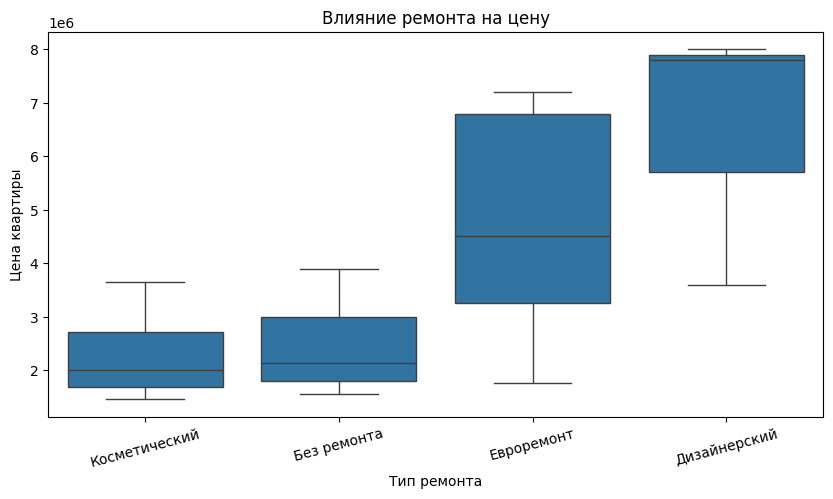

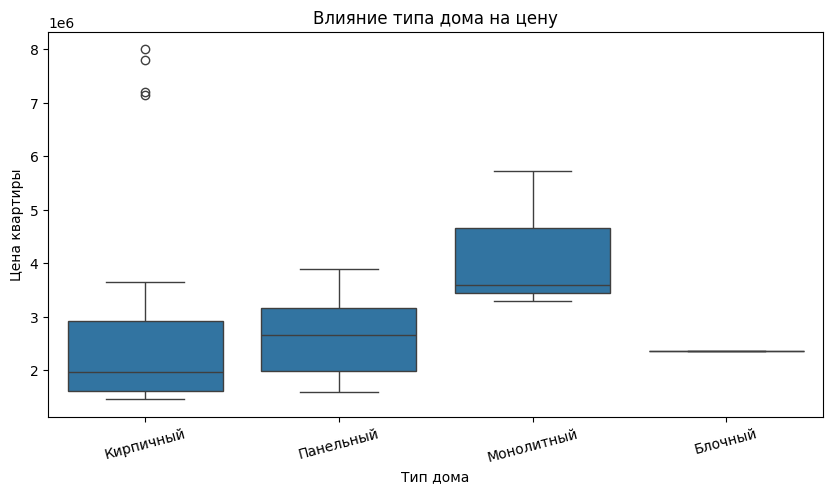

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Влияние ремонта на цену
plt.figure(figsize=(10, 5))
sns.boxplot(
    x=df_sample['Interier_Index'].replace({v: k for k, v in interier_map.items()}),
    y=df_sample['Price']
)
plt.xlabel("Тип ремонта")
plt.ylabel("Цена квартиры")
plt.title("Влияние ремонта на цену")
plt.xticks(rotation=15)
plt.show()

# 2. Влияние типа дома на цену
plt.figure(figsize=(10, 5))
sns.boxplot(
    x=df_sample['House_Index'].replace({v: k.strip() for k, v in house_map.items()}),
    y=df_sample['Price']
)
plt.xlabel("Тип дома")
plt.ylabel("Цена квартиры")
plt.title("Влияние типа дома на цену")
plt.xticks(rotation=15)
plt.show()

## Двухфакторный анализ

In [18]:
# Формируем модель ANOVA
formula1 = 'Price ~ C(Interier_Index) + C(House_Index) + C(Interier_Index):C(House_Index)'
model1 = ols(formula1, data=df_sample).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)

# Выводим результаты
print("ANOVA: Влияние ремонта и типа дома на цену")
print(anova_table1)

ANOVA: Влияние ремонта и типа дома на цену
                                        sum_sq    df         F    PR(>F)
C(Interier_Index)                 7.832846e+09   3.0  0.002606  0.959531
C(House_Index)                    1.007356e+12   3.0  0.335200  0.565781
C(Interier_Index):C(House_Index)  3.235190e+13   9.0  3.588383  0.013428
Residual                          4.107167e+13  41.0       NaN       NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 4
  warnings.warn('covariance of constraints does not have full '


In [19]:
# Формируем модель ANOVA
formula2 = 'Price ~ C(Interier_Index) + Total_Meters + C(Interier_Index):Total_Meters'
model2 = ols(formula2, data=df_sample).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

# Выводим результаты
print("\nANOVA: Влияние ремонта и площади на цену")
print(anova_table2)


ANOVA: Влияние ремонта и площади на цену
                                      sum_sq    df           F        PR(>F)
C(Interier_Index)               1.221216e+13   3.0   13.520652  2.585915e-06
Total_Meters                    4.476727e+13   1.0  148.691768  2.189125e-15
C(Interier_Index):Total_Meters  7.430696e+11   3.0    0.822687  4.887390e-01
Residual                        1.264512e+13  42.0         NaN           NaN


In [20]:
print(df_sample[['Interier_Index', 'House_Index', 'Total_Meters']].corr())

                Interier_Index  House_Index  Total_Meters
Interier_Index        1.000000     0.110384      0.430076
House_Index           0.110384     1.000000     -0.021285
Total_Meters          0.430076    -0.021285      1.000000


## Выводы

### 1. Индекс ремонта (Interier_Index) и площадь (Total_Meters) коррелируют положительно (0.43)

*   Это значит, что более крупные квартиры чаще имеют лучший ремонт.
*   В модели "Ремонт + Площадь" часть влияния ремонта может "перетекать" в площадь, уменьшая его статистическую значимость.


### 2. Индекс ремонта (Interier_Index) и тип дома (House_Index) почти не связаны (0.11)

*   Это означает, что ремонт распределен примерно равномерно между разными типами домов.
*   В модели "Ремонт + Тип дома" ремонт влияет на цену самостоятельно, а значит, его эффект может быть сильнее.


### 3. Индекс типа дома (House_Index) и площадь (Total_Meters) не связаны (-0.02)

*   Это значит, что в Промышленном районе тип дома не влияет на площадь квартиры.

